# NYC Yellow Taxi

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. 

Our goal is to use data-driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.


## Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and method of payment. We use python hypothesis testing and descriptive statistic to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash. 

In [154]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as st 
import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset

https://data.world/vizwiz/nyc-taxi-jan-2020

1. **VendorID**: A code indicating the TPEP provider that provided the record. 1 = Creative Mobile Technologies, LLC; 2= VeriFone Inc.
2. **tpep_pickup_datetime**: The date and time when the meter was engaged. 
3. **tpep_dropoff_datetime**: The date and time when the meter was disengaged. 
4. **Passenger_count**: The number of passengers in the vehicle. 
5. **Trip-distance**: The elapsed trip distance in miles reported by the taximeter. 
6. **PULocationID**: TLC Taxi Zone in which the taximeter was engaged. 
7. **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged. 
8. **RateCodeID**: The final rate code in effect at the end of the trip. 1=Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6= Group ride. 
9. **Store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward", because the vehicle did not have a connection to the server. Y= store and forward trip, N=not a store and forward trip
10. **Payment_type**: A numeric code signifying how the passenger paid for the trip. 1=credit card, 2=cash, 3=No charge, 4=Dispute, 5=Unknown, 6=Voided trip.
11. **Fare_amount**: The time-and-distance fare calculated by the meter. 
12. **Extra**: Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges. 
13. **MTA_tax**: $0.50 MTA tax that is automatically triggered based on the metered rate in use. 
14. **Improvement_surchage**: $0.30 improvement surchage assessed trips at the flag drop. The improvement surcharge began being levied in 2015. 
15. **Tip_amount**: This field is automatically populated for credit card tips. Cash tips are not included. 
16. **Tolls_amount**: Total amount of all tolls paid in trip. 
17. **Total_amount**: The total amount charges to passengers. Does not include cash tips.
18. **Congestion_Surchage**: Total amount collected in trip for NYS congestion surcharge. 

In [114]:
data_path = r"C:\Users\Wen\OneDrive\Documents\GitHub\Portfolio_Project\Data Analysis\Statistics Project\NYC Yellow Taxi\vizwiz-nyc-taxi-jan-2020\yellow_tripdata_2020-01.csv"
df = pd.read_csv(data_path)
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [115]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [116]:
df.shape

(6405008, 18)

In [117]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [118]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [119]:
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"])
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39


In [120]:
df["seconds"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,seconds
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39,22.650000


In [121]:
df = df[["passenger_count","trip_distance", "payment_type", "fare_amount", "duration"]]
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.00,0 days 00:04:48
1,1.0,1.20,1.0,7.00,0 days 00:07:25
2,1.0,0.60,1.0,6.00,0 days 00:06:11
3,1.0,0.80,1.0,5.50,0 days 00:04:51
4,1.0,0.00,2.0,3.50,0 days 00:02:18
...,...,...,...,...,...
6405003,NaN,3.24,NaN,17.59,0 days 00:31:00
6405004,NaN,22.13,NaN,46.67,0 days 01:16:00
6405005,NaN,10.51,NaN,48.85,0 days 00:27:50
6405006,NaN,5.49,NaN,27.17,0 days 00:22:39


# Clean Data

In [122]:
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [123]:
df.dropna(subset=["passenger_count", "payment_type"], inplace=True)
df.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [124]:
df.dtypes

passenger_count            float64
trip_distance              float64
payment_type               float64
fare_amount                float64
duration           timedelta64[ns]
dtype: object

In [125]:
df["passenger_count"] = df["passenger_count"].astype("int64")
df["payment_type"] = df["payment_type"].astype("int64")
df.dtypes

passenger_count              int64
trip_distance              float64
payment_type                 int64
fare_amount                float64
duration           timedelta64[ns]
dtype: object

In [126]:
df[df.duplicated()].sum()

passenger_count                4022684
trip_distance               4700899.61
payment_type                   4018601
fare_amount                26853721.53
duration           20185 days 03:16:27
dtype: object

In [127]:
df.drop_duplicates(inplace=True)


In [132]:
print(df.duplicated().sum())


0


In [133]:
df["passenger_count"].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [134]:
payment_type_counts = df["payment_type"].value_counts(normalize=True)
payment_type_counts 

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [136]:
df = df[df["payment_type"]< 3]
df = df[(df["passenger_count"]>0)& (df["passenger_count"]<6)]

In [137]:
df.shape

(2780283, 5)

In [138]:
df["payment_type"].replace([1,2], ["Card", "Cash"], inplace=True)
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,0 days 00:04:48
1,1,1.20,Card,7.0,0 days 00:07:25
2,1,0.60,Card,6.0,0 days 00:06:11
3,1,0.80,Card,5.5,0 days 00:04:51
4,1,0.00,Cash,3.5,0 days 00:02:18
...,...,...,...,...,...
6339555,3,2.09,Card,10.0,0 days 00:14:48
6339561,1,4.11,Card,17.5,0 days 00:21:30
6339563,1,2.13,Card,13.0,0 days 00:19:00
6339564,1,2.55,Card,12.5,0 days 00:16:17


In [139]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2780283
mean,1.733386e+00,4.536729e+00,1.780567e+01,0 days 00:24:09.286787711
std,1.176652e+00,4.895890e+00,1.506997e+01,0 days 01:32:36.018871025
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2 days +01:49:38
25%,1.000000e+00,1.500000e+00,9.000000e+00,0 days 00:09:53
50%,1.000000e+00,2.730000e+00,1.300000e+01,0 days 00:15:44
75%,2.000000e+00,5.470000e+00,2.100000e+01,0 days 00:23:22
max,5.000000e+00,2.628800e+02,4.265000e+03,5 days 22:05:07


In [146]:
for col in ["fare_amount", "trip_distance", "duration"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1 
    lower_bound = q1-1.5*IQR
    uppder_bound = q3+1.5*IQR
    
    df = df[(df[col]>=lower_bound) & (df[col]<=uppder_bound)]     

In [152]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,0 days 00:04:48
1,1,1.20,Card,7.0,0 days 00:07:25
2,1,0.60,Card,6.0,0 days 00:06:11
3,1,0.80,Card,5.5,0 days 00:04:51
5,1,0.03,Cash,2.5,0 days 00:00:53
...,...,...,...,...,...
6339550,4,2.40,Card,10.5,0 days 00:12:23
6339555,3,2.09,Card,10.0,0 days 00:14:48
6339561,1,4.11,Card,17.5,0 days 00:21:30
6339563,1,2.13,Card,13.0,0 days 00:19:00


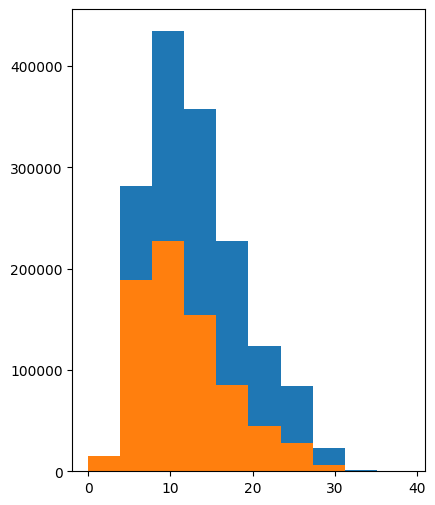

In [157]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(df[df["payment_type"]=="Card"]["fare_amount"], histtype="barstacked", bins = 20, edgecolor = "k",  color = )
plt.hist(df[df["payment_type"]=="Cash"]["fare_amount"], histtype="barstacked")
plt.show()

Visualizing the distribution of payment types


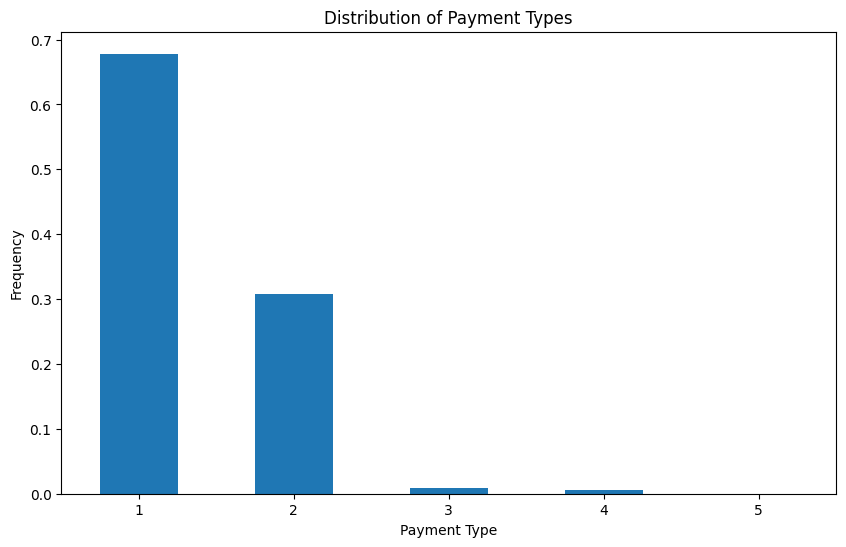

In [143]:
plt.figure(figsize=(10, 6))
payment_type_counts.plot(kind="bar")
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

Box plot to compare fare amounts by payment type

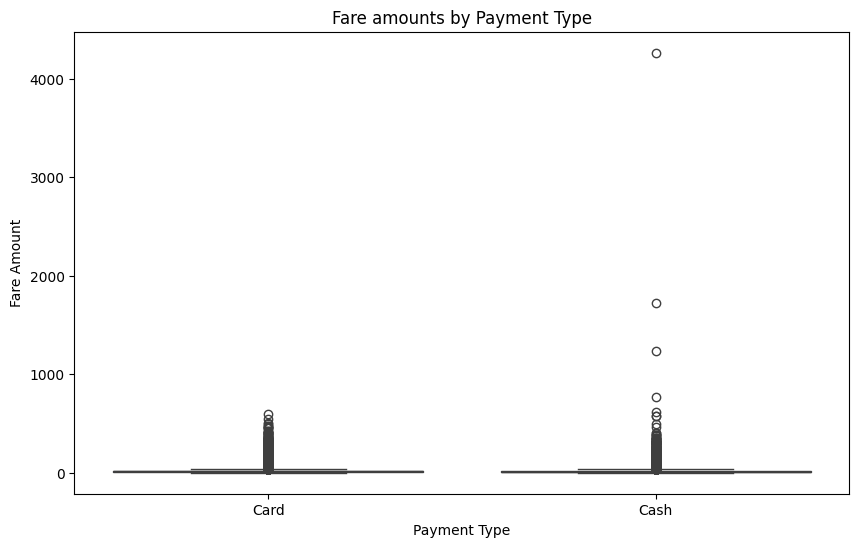

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(x="payment_type", y="fare_amount", data=df)
plt.title("Fare amounts by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Fare Amount")
plt.show()

In [ ]:
import pandas as pd
from scipy import stats

# Load your data

# Filter the dataset for relevant payment types, excluding type 5
df_filtered = df[df['payment_type'].isin([1.0, 2.0, 3.0, 4.0])]

# Performing a Kruskal-Wallis Test (non-parametric) if the data isn't normally distributed
stat, p = stats.kruskal(
    df_filtered[df_filtered['payment_type'] == 1.0]['fare_amount'],
    df_filtered[df_filtered['payment_type'] == 2.0]['fare_amount'],
    df_filtered[df_filtered['payment_type'] == 3.0]['fare_amount'],
    df_filtered[df_filtered['payment_type'] == 4.0]['fare_amount']
)

print('Kruskal-Wallis Test Statistic:', stat)
print('P-Value:', p)

# Decide on next steps based on the p-value
if p < 0.05:
    print("Reject the null hypothesis - There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the groups.")


Kruskal-Wallis Test Statistic: 39594.60863065549
P-Value: 0.0
Reject the null hypothesis - There is a significant difference between the groups.


In [ ]:
import scikit_posthocs as sp
import pandas as pd

# Assuming df_filtered is your dataframe filtered to the relevant payment types
posthoc = sp.posthoc_dunn(df_filtered, val_col='fare_amount', group_col='payment_type', p_adjust='bonferroni')

print(posthoc)


     1.0  2.0  3.0  4.0
1.0  1.0  0.0  0.0  0.0
2.0  0.0  1.0  0.0  0.0
3.0  0.0  0.0  1.0  0.0
4.0  0.0  0.0  0.0  1.0


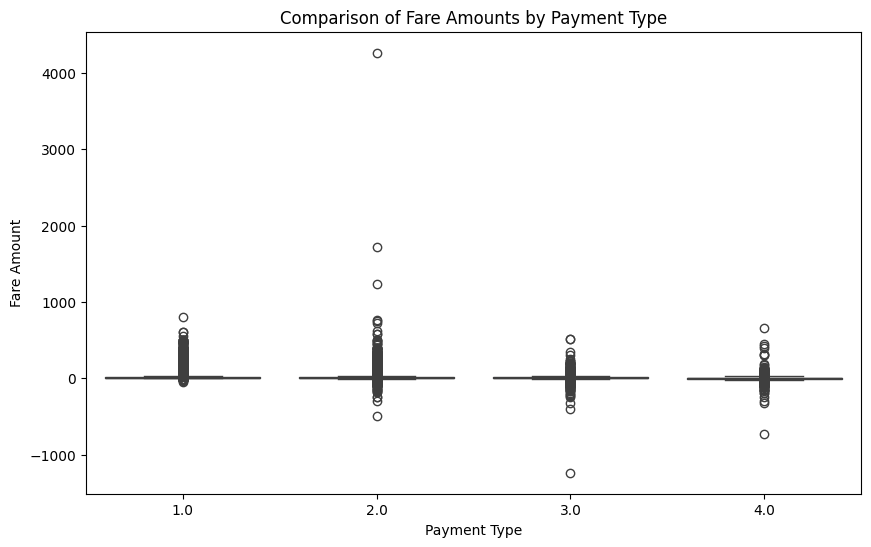

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of fare amounts by payment type
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='fare_amount', data=df_filtered)
plt.title('Comparison of Fare Amounts by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.show()
